# House Price Prediction

In this end to end project, I'm going to build a house predicting model based on the Ames Housing Data feautre

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('Ames_Housing_Data.csv')

In [3]:
## Here contains the description of each features.
with open('Ames_Housing_Feature_Description.txt','r') as f:
    print(f.read())

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

## 1. Checking data

In [4]:
df.head()

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [5]:
## There are 81 features and 2930 entries. The goal is to predict the housing price based on all 80 features.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 81 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PID              2930 non-null   int64  
 1   MS SubClass      2930 non-null   int64  
 2   MS Zoning        2930 non-null   object 
 3   Lot Frontage     2440 non-null   float64
 4   Lot Area         2930 non-null   int64  
 5   Street           2930 non-null   object 
 6   Alley            198 non-null    object 
 7   Lot Shape        2930 non-null   object 
 8   Land Contour     2930 non-null   object 
 9   Utilities        2930 non-null   object 
 10  Lot Config       2930 non-null   object 
 11  Land Slope       2930 non-null   object 
 12  Neighborhood     2930 non-null   object 
 13  Condition 1      2930 non-null   object 
 14  Condition 2      2930 non-null   object 
 15  Bldg Type        2930 non-null   object 
 16  House Style      2930 non-null   object 
 17  Overall Qual  

## 2. Preprocessing Data

### 2.1 Remove Outlier

In [6]:
## After checking the correlatoin with all features with SalePrice, Looks like Overall quality has the highest correlation with Sale Price
df.corr()['SalePrice'].sort_values()

PID               -0.246521
Enclosed Porch    -0.128787
Kitchen AbvGr     -0.119814
Overall Cond      -0.101697
MS SubClass       -0.085092
Low Qual Fin SF   -0.037660
Bsmt Half Bath    -0.035835
Yr Sold           -0.030569
Misc Val          -0.015691
BsmtFin SF 2       0.005891
3Ssn Porch         0.032225
Mo Sold            0.035259
Pool Area          0.068403
Screen Porch       0.112151
Bedroom AbvGr      0.143913
Bsmt Unf SF        0.182855
Lot Area           0.266549
2nd Flr SF         0.269373
Bsmt Full Bath     0.276050
Half Bath          0.285056
Open Porch SF      0.312951
Wood Deck SF       0.327143
Lot Frontage       0.357318
BsmtFin SF 1       0.432914
Fireplaces         0.474558
TotRms AbvGrd      0.495474
Mas Vnr Area       0.508285
Garage Yr Blt      0.526965
Year Remod/Add     0.532974
Full Bath          0.545604
Year Built         0.558426
1st Flr SF         0.621676
Total Bsmt SF      0.632280
Garage Area        0.640401
Garage Cars        0.647877
Gr Liv Area        0

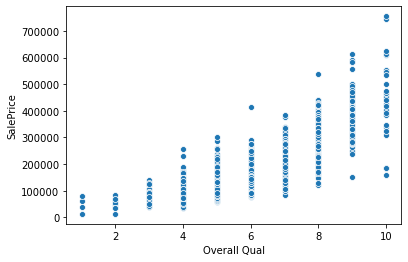

In [7]:
sns.scatterplot(x='Overall Qual',y='SalePrice',data =df)

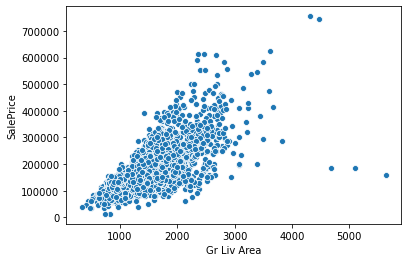

In [8]:
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data = df)

In [9]:
## Here are the suspicious outliers that will influence the model based on Overall quality feature. 
## They have very high overall quality but have relatively low sale price.
df[(df['Overall Qual'] > 8) & (df['SalePrice'] < 200000)] 

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1182,533350090,60,RL,NaN,24572,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Family,150000
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [10]:
## Here are the suspicious outliers that will influence the model based on Grond Living Area feature. 
## They have very large ground living area but have relatively low sale price.
df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)] 

,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1498,908154235,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000
2180,908154195,20,RL,128.0,39290,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,Elev,17000,10,2007,New,Partial,183850
2181,908154205,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750


In [11]:
## As we can see, based on the plot and filter above, index 1498, 2180 and 2181 are common outliers that we need to remove.
drop_index = df[(df['Gr Liv Area'] > 4000) & (df['SalePrice'] < 200000)].index
df = df.drop(drop_index,axis = 0)

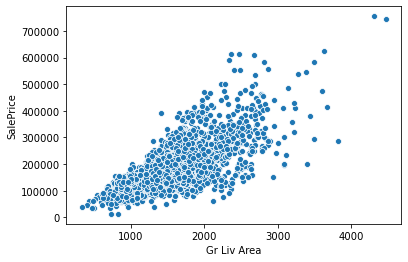

In [12]:
## Check that the outliers have been removed
sns.scatterplot(x='Gr Liv Area',y='SalePrice',data = df)

### 2.2 Adjust Missing Data

In [13]:
df = df.drop('PID',axis = 1)

In [14]:
def percent_missing(df):
    miss_percent = 100 * df.isnull().sum() / len(df)
    return miss_percent[miss_percent > 0].sort_values()

In [15]:
## Check the missing percentage for every feature.
percent_num = percent_missing(df)
percent_num

Electrical         0.034165
Garage Area        0.034165
Total Bsmt SF      0.034165
Bsmt Unf SF        0.034165
BsmtFin SF 1       0.034165
BsmtFin SF 2       0.034165
Garage Cars        0.034165
Bsmt Full Bath     0.068329
Bsmt Half Bath     0.068329
Mas Vnr Area       0.785787
Mas Vnr Type       0.785787
BsmtFin Type 1     2.733174
Bsmt Qual          2.733174
Bsmt Cond          2.733174
BsmtFin Type 2     2.767339
Bsmt Exposure      2.835668
Garage Type        5.363854
Garage Finish      5.432183
Garage Qual        5.432183
Garage Cond        5.432183
Garage Yr Blt      5.432183
Lot Frontage      16.740690
Fireplace Qu      48.582166
Fence             80.457807
Alley             93.235395
Misc Feature      96.412709
Pool QC           99.590024
dtype: float64

(0.0, 1.0)

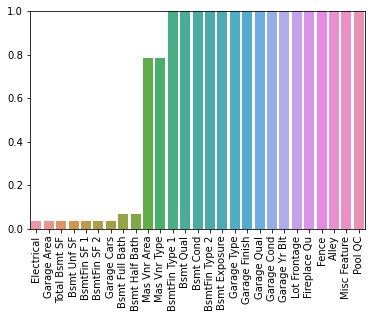

In [16]:
## Visualize the missing percentage for every feature. Check the features that missing only 1% data first
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [17]:
## According to the graph, electrical, garage area and some of the feature are missing only a few or may be 1 value.
## Try to drop rows with the features have the same missing percentage to see whether it's a row that missing all these features
df = df.dropna(axis = 0, subset = ['Electrical','Garage Area'])

(0.0, 1.0)

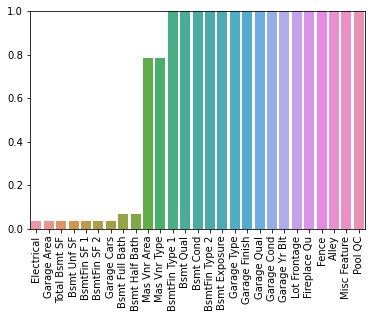

In [18]:
## check it again. Some of the features have been dropped.
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [20]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [21]:
df[df['BsmtFin SF 1'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1341,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,...,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [19]:
## According to some deep dive above, we can see that feature related with basement means that house doesn't have basement
## So, fill 'None' to the missing string feature, and fill 0 to the missing numerical feature
basement_num = ['BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','Bsmt Full Bath','Bsmt Half Bath']
df[basement_num] = df[basement_num].fillna(0)

basement_cat = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df[basement_cat] = df[basement_cat].fillna('None')

(0.0, 1.0)

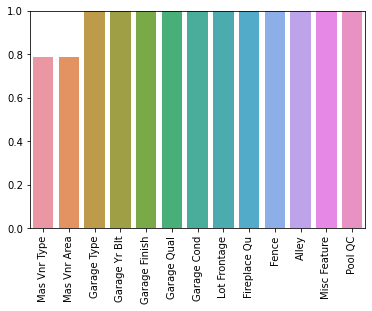

In [23]:
## Almost fill all the features that missing percentage is less than 1%. 2 left.
percent_num = percent_missing(df)
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)
plt.ylim(0,1)

In [20]:
## According to the description, missing masonry veneer type and masonry veneer area means the house doesn't have one
## So the same, fill the string type with 'None' and fill the numerical area with 0
df['Mas Vnr Type'] = df['Mas Vnr Type'].fillna('None')
df['Mas Vnr Area'] = df['Mas Vnr Type'].fillna(0)

(0.0, 1.0)

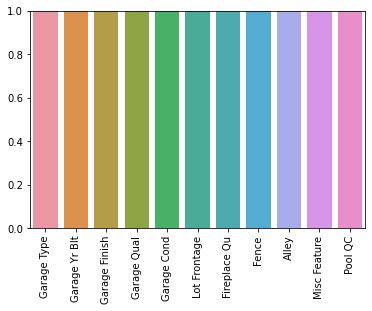

In [25]:
## All done clean the data with missing percentage less than 1%
percent_num = percent_missing(df)
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)
plt.ylim(0,1)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 <a list of 11 Text major ticklabel objects>)

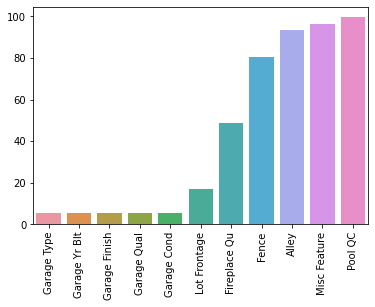

In [26]:
## Clean all the features related with garage
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)

In [21]:
## The same as above, missing value in garage means no garage, so fill the string type with 'None' and fill the numerical area with 0
garage_cat = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df[garage_cat] = df[garage_cat].fillna('None')
df['Garage Yr Blt'] = df['Garage Yr Blt'].fillna(0)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

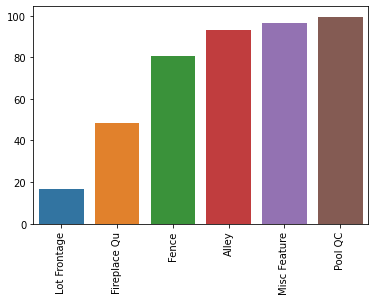

In [28]:
percent_num = percent_missing(df)
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)

In [22]:
## For the features that have more than 80% missing, drop all missing data.
df = df.drop(['Pool QC','Misc Feature','Alley','Fence'],axis = 1)

(array([0, 1]), <a list of 2 Text major ticklabel objects>)

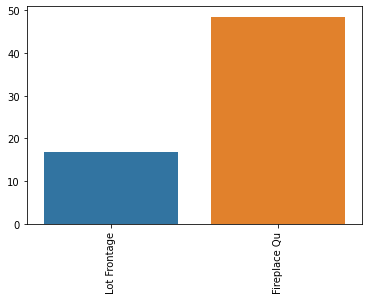

In [30]:
percent_num = percent_missing(df)
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)

In [23]:
## The rest are the data not easy to fill and better not be dropped directly.
## For Fireplace Qu, missing means None. For Lot Frontage, it means linear feet of street connected to property, it depends on the neighborhood
df['Fireplace Qu'] = df['Fireplace Qu'].fillna('None')
df['Lot Frontage'] = df.groupby('Neighborhood')['Lot Frontage'].transform(lambda value: value.fillna(value.mean()))

(array([0]), <a list of 1 Text major ticklabel objects>)

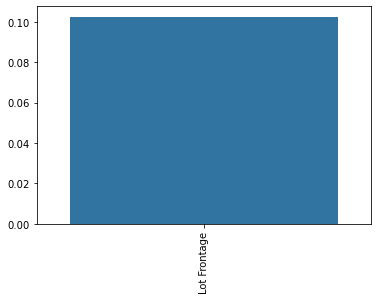

In [24]:
## Because there are still some of the Neighborhood don't have lot frontage, but as current missing number, just drop it.
percent_num = percent_missing(df)
sns.barplot(x=percent_num.index,y = percent_num)
plt.xticks(rotation=90)

In [25]:
## Drop the final missing value, All Done
df['Lot Frontage'] = df['Lot Frontage'].fillna('0')

### 2.3 EDA - Numerical Datatypes Visualization to Sale Price

In [27]:
df_object = df.select_dtypes(include = 'object')

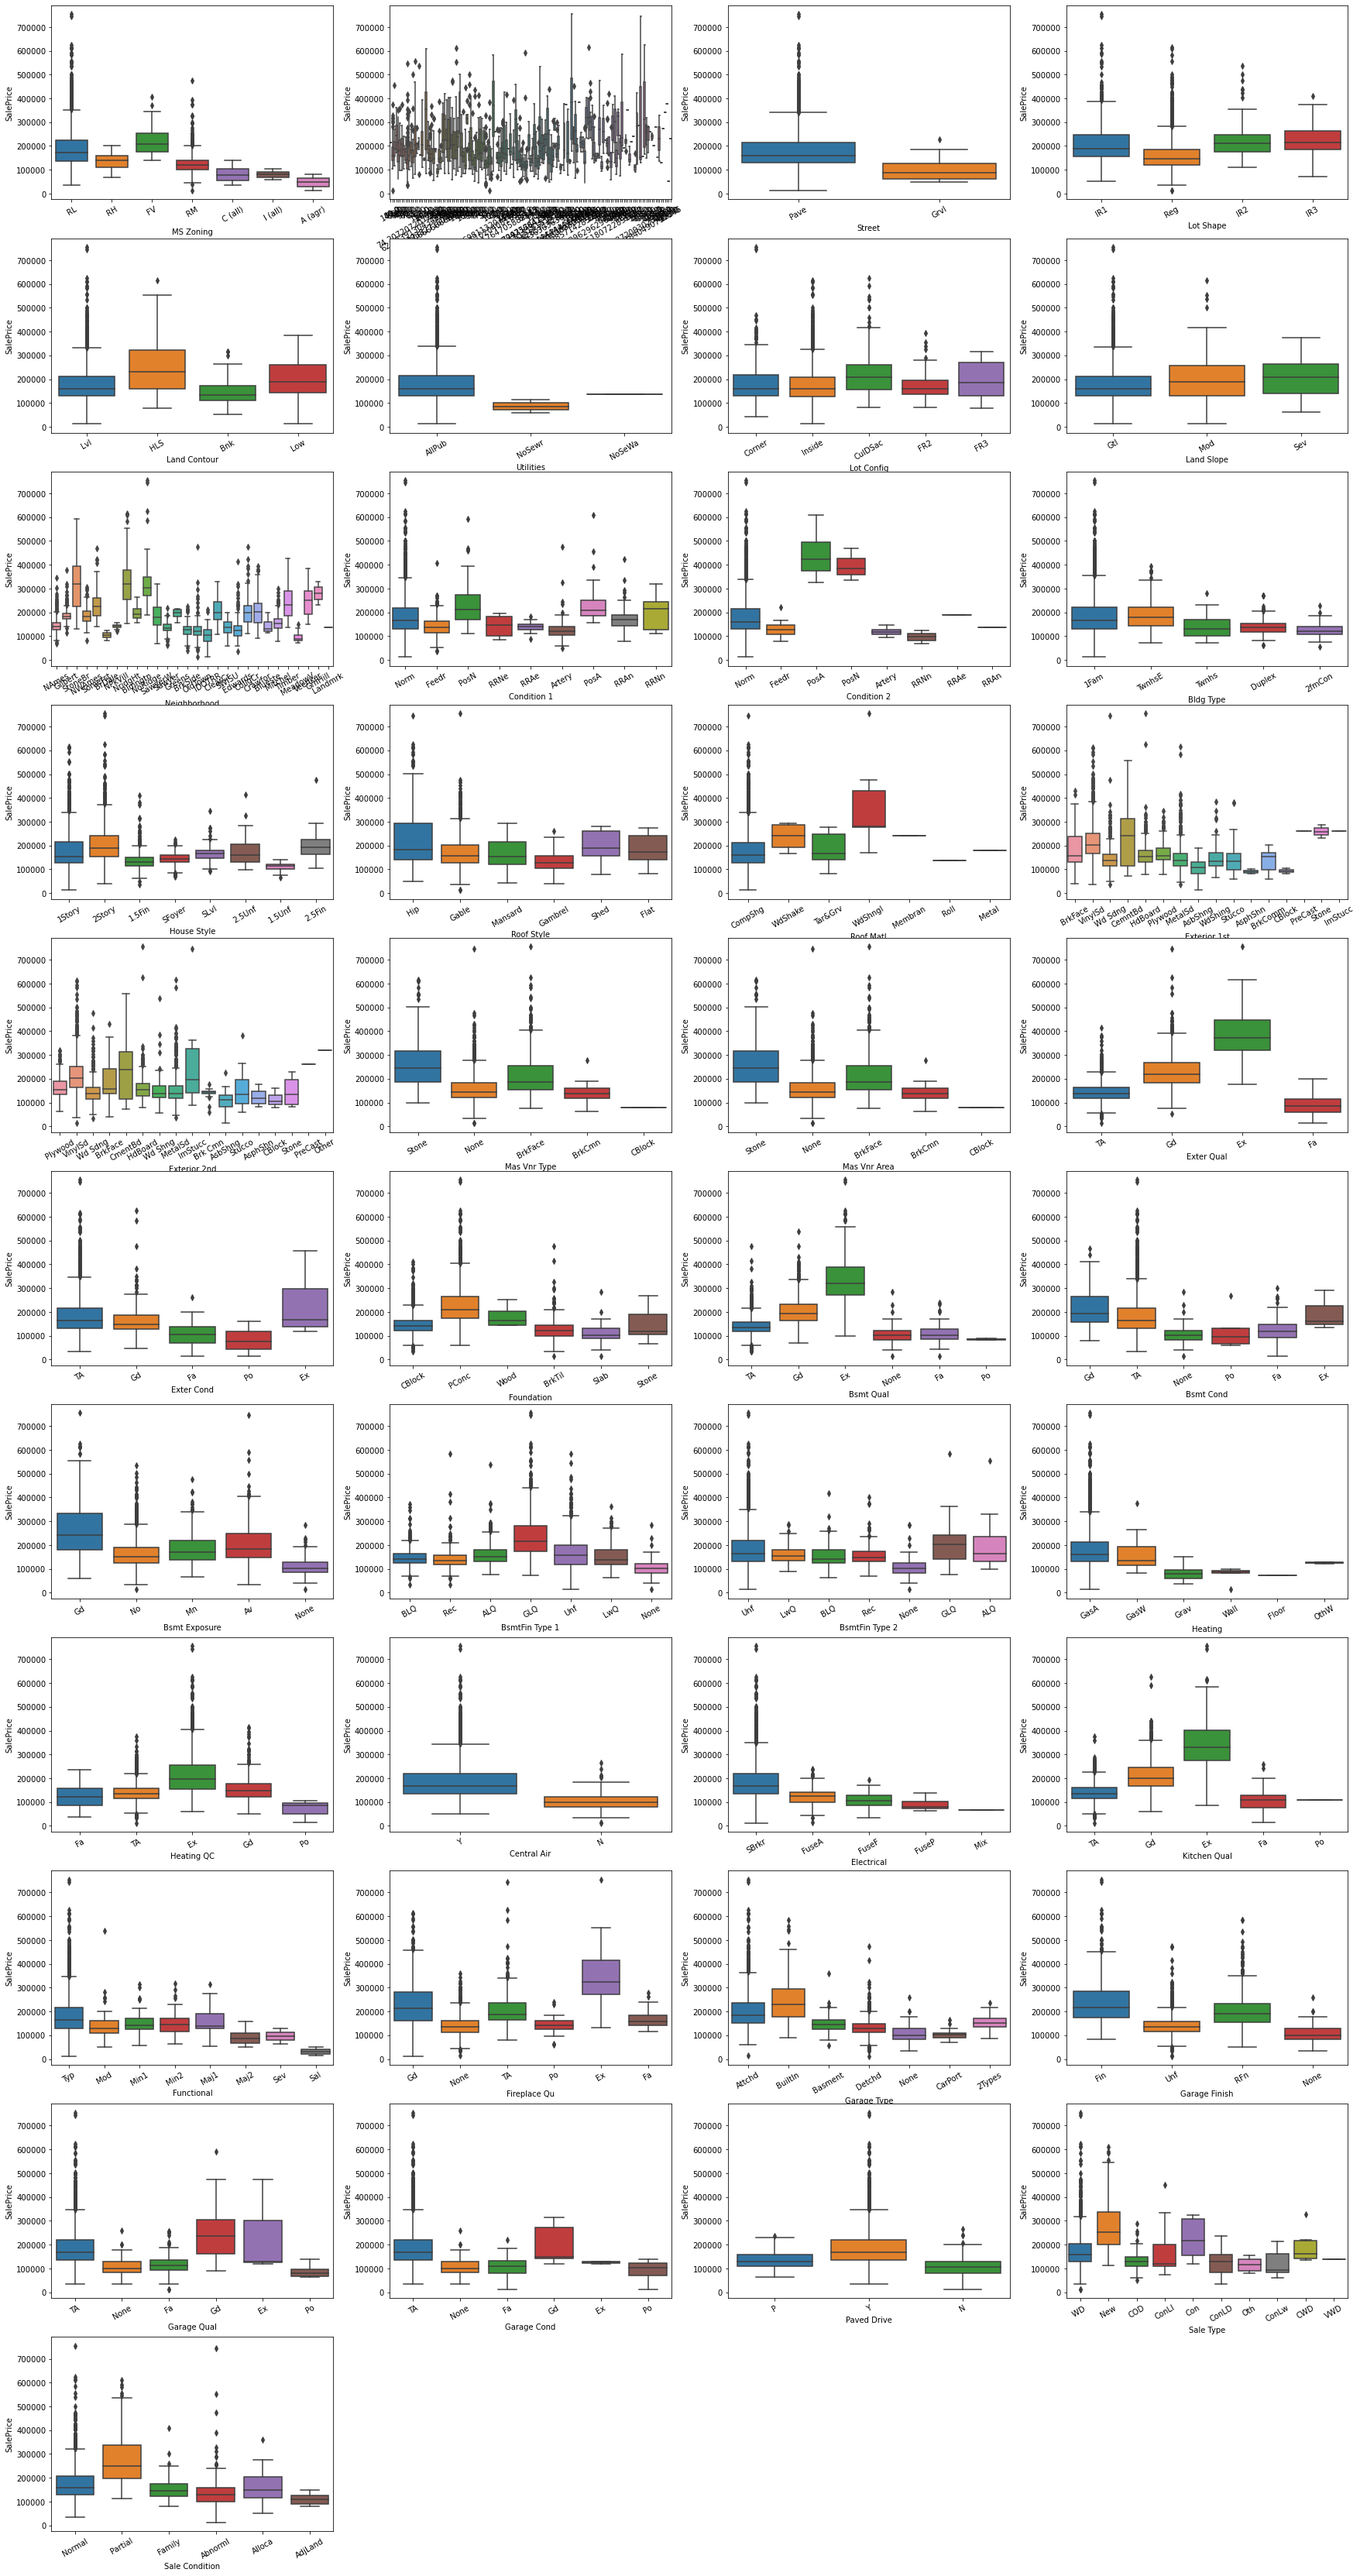

In [34]:
plt.figure(figsize=(30,60))
for k, v in enumerate(df_object):
    plt.subplot(11, 4, k+1)
    sns.boxplot(x=v, y='SalePrice', data=df)
    plt.xticks(rotation=30)

### 2.4 EDA - Object Datatypes Visualization to Sale Price

In [36]:
df_num = df.select_dtypes(exclude = 'object')

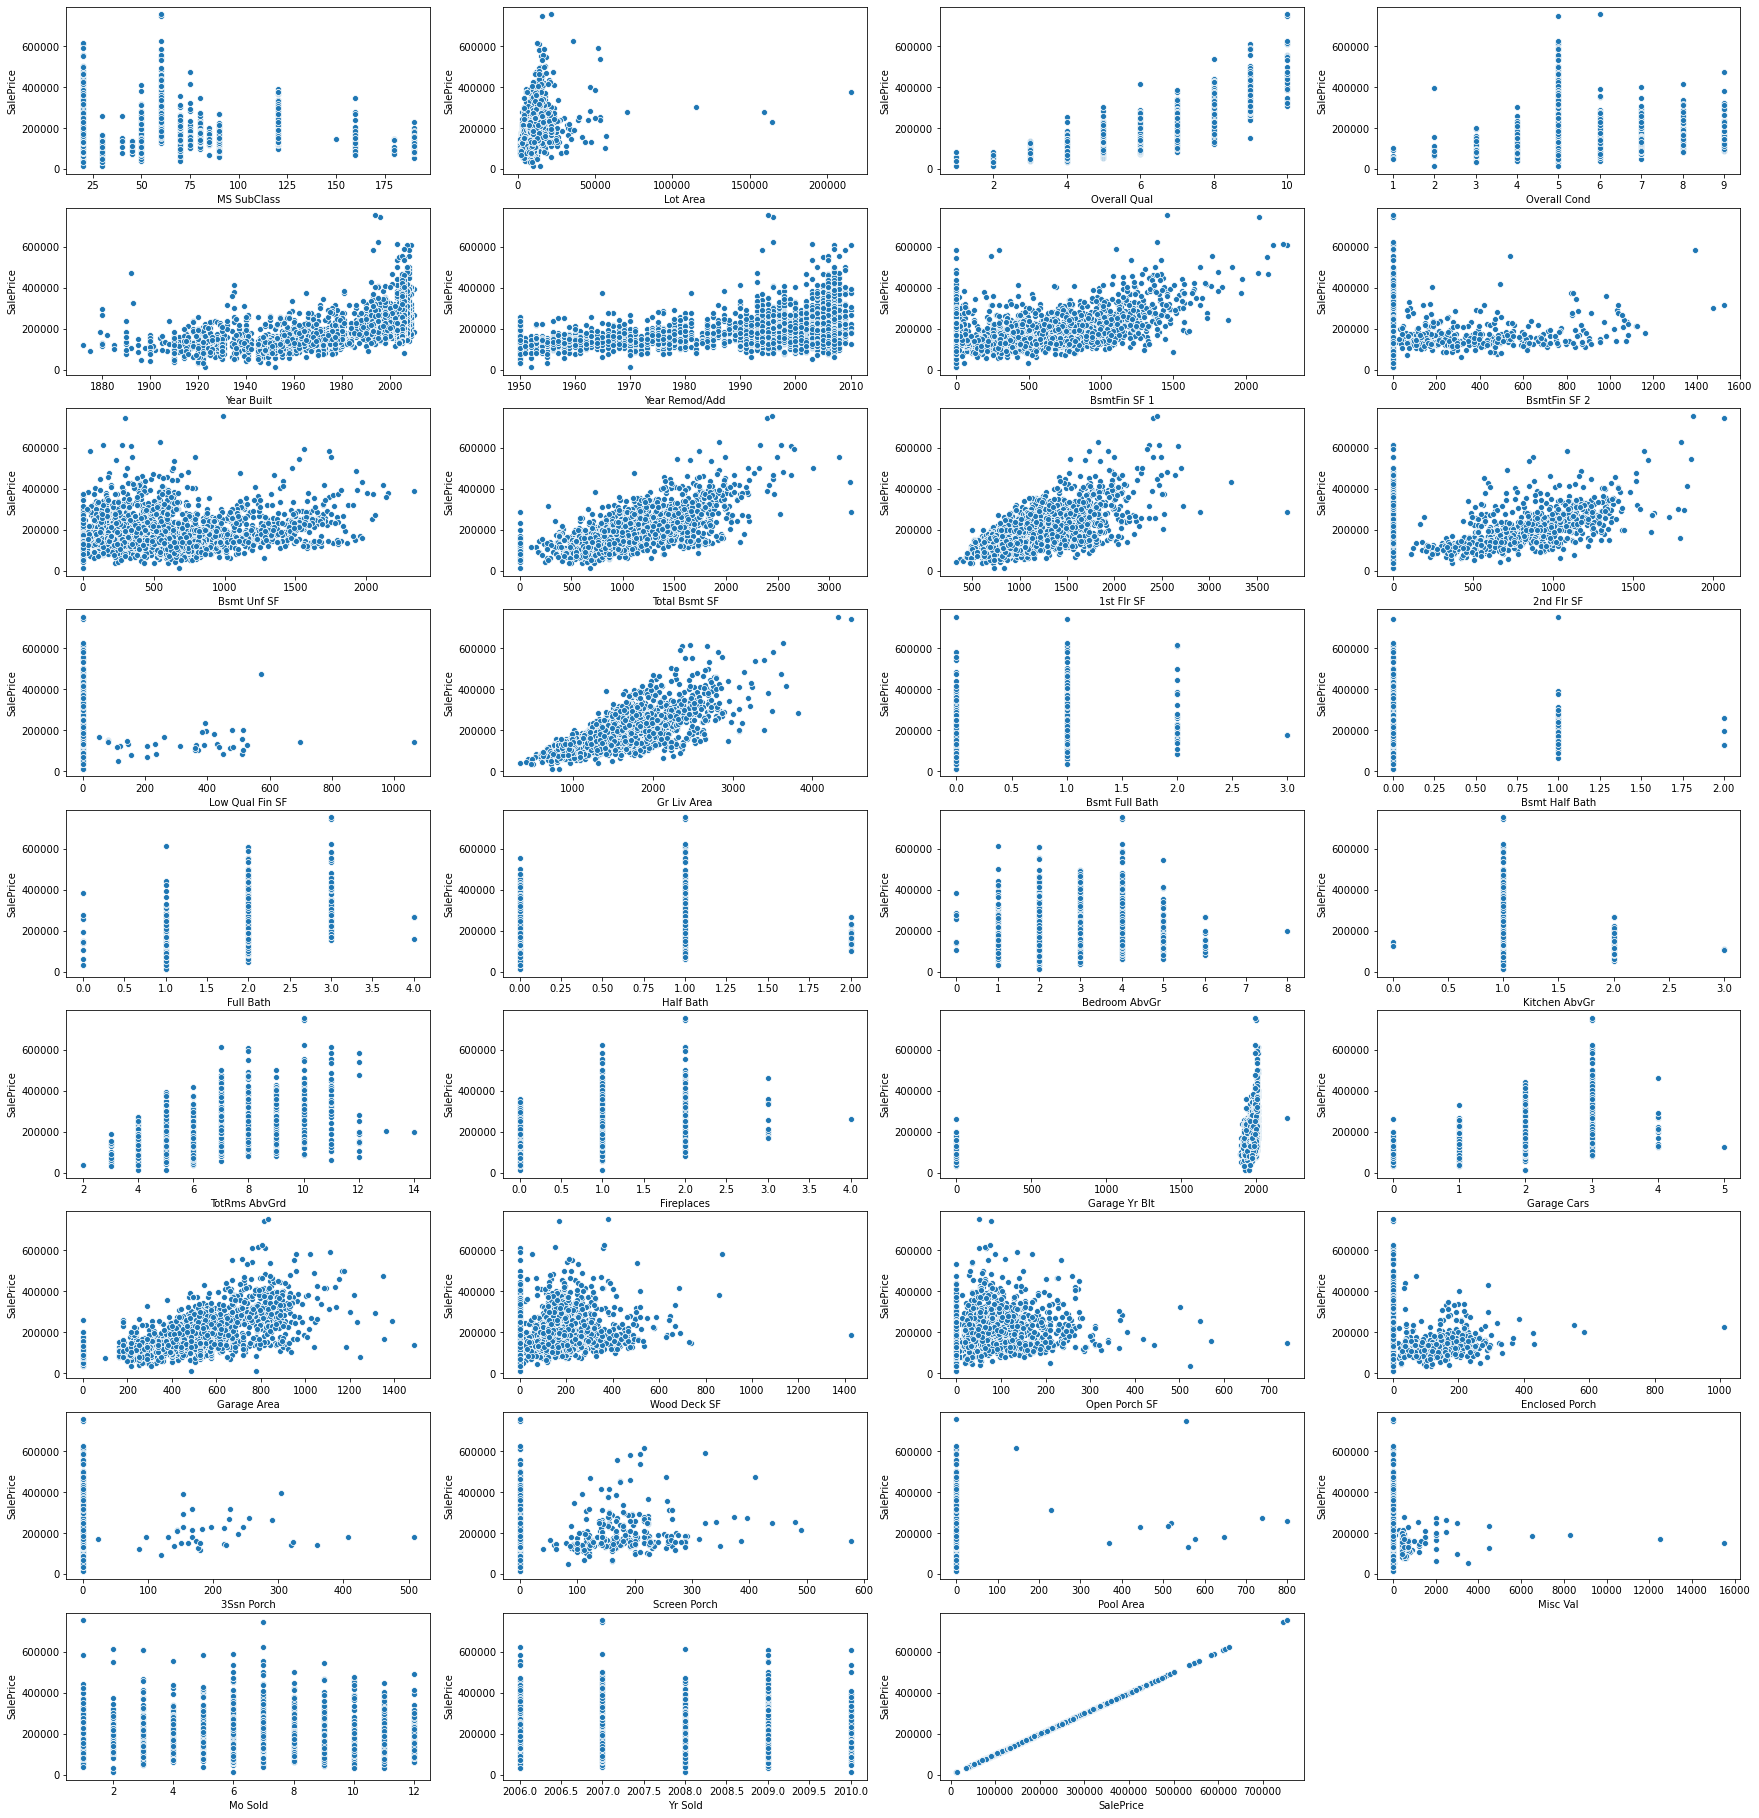

In [37]:
plt.figure(figsize=(30,40))
for k, v in enumerate(df_num):
    plt.subplot(11, 4, k+1)
    sns.scatterplot(x=v, y='SalePrice', data=df)

### 2.5 Dealing Categorical Data

In [38]:
## switch the categorical data to dummy variable
df_object_dummies = pd.get_dummies(df_object,drop_first = True)
df_object_dummies

,MS Zoning_C (all),MS Zoning_FV,MS Zoning_I (all),MS Zoning_RH,MS Zoning_RL,MS Zoning_RM,Lot Frontage_22.0,Lot Frontage_24.0,Lot Frontage_25.0,Lot Frontage_25.606060606060606,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
1,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
4,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2926,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2927,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
2928,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0


In [39]:
## Concat the dummy categorical data to numerical data
final_df = pd.concat([df_num,df_object_dummies],axis = 1)
final_df

,MS SubClass,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,...,Sale Type_ConLw,Sale Type_New,Sale Type_Oth,Sale Type_VWD,Sale Type_WD,Sale Condition_AdjLand,Sale Condition_Alloca,Sale Condition_Family,Sale Condition_Normal,Sale Condition_Partial
0,20,31770,6,5,1960,1960,639.0,0.0,441.0,1080.0,...,0,0,0,0,1,0,0,0,1,0
1,20,11622,5,6,1961,1961,468.0,144.0,270.0,882.0,...,0,0,0,0,1,0,0,0,1,0
2,20,14267,6,6,1958,1958,923.0,0.0,406.0,1329.0,...,0,0,0,0,1,0,0,0,1,0
3,20,11160,7,5,1968,1968,1065.0,0.0,1045.0,2110.0,...,0,0,0,0,1,0,0,0,1,0
4,60,13830,5,5,1997,1998,791.0,0.0,137.0,928.0,...,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2925,80,7937,6,6,1984,1984,819.0,0.0,184.0,1003.0,...,0,0,0,0,1,0,0,0,1,0
2926,20,8885,5,5,1983,1983,301.0,324.0,239.0,864.0,...,0,0,0,0,1,0,0,0,1,0
2927,85,10441,5,5,1992,1992,337.0,0.0,575.0,912.0,...,0,0,0,0,1,0,0,0,1,0
2928,20,10010,5,5,1974,1975,1071.0,123.0,195.0,1389.0,...,0,0,0,0,1,0,0,0,1,0


In [37]:
final_df.corr()['SalePrice'].sort_values()

Exter Qual_TA       -0.591459
Kitchen Qual_TA     -0.527461
Fireplace Qu_None   -0.481740
Bsmt Qual_TA        -0.453022
Garage Finish_Unf   -0.422363
                       ...   
Garage Cars          0.648488
Total Bsmt SF        0.660983
Gr Liv Area          0.727279
Overall Qual         0.802637
SalePrice            1.000000
Name: SalePrice, Length: 412, dtype: float64

## 3. Modelling

### 3.1 Train Test Split

In [45]:
## Separate out the data into X features and y labels
X = final_df.drop('SalePrice',axis=1)
y = final_df['SalePrice']

In [43]:
from sklearn.model_selection import train_test_split

In [46]:
## Use scikit-learn to split up X and y into a training set and test set. Since we will later be using a Grid Search strategy, set your test proportion to 10%.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=101)

### 3.2 Standard Scaler

In [50]:
## The dataset features has a variety of scales and units. For optimal regression performance, scale the X features.
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

### 3.3 Elastic Net

In [51]:
from sklearn.linear_model import ElasticNet

In [52]:
base_elastic_model = ElasticNet()

In [53]:
param_grid = {'alpha':[0.1,1,5,10,50,100],
              'l1_ratio':[.1, .5, .7, .9, .95, .99, 1]}

In [54]:
from sklearn.model_selection import GridSearchCV

In [55]:
grid_model = GridSearchCV(estimator=base_elastic_model,
                          param_grid=param_grid,
                          scoring='neg_mean_squared_error',
                          cv=5,
                          verbose=1)

In [56]:
grid_model.fit(scaled_X_train,y_train)

Fitting 5 folds for each of 42 candidates, totalling 210 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
E:\DataScience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 114248952635.41785, tolerance: 1355206692.5276787
  model = cd_fast.enet_coordinate_descent(
E:\DataScience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 151853666003.94366, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
E:\DataScience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 119760279014.79248, tolerance: 1415056940.006106
  model = cd_fast.enet_coordinate_descent(
E:\DataScience\lib\site-packages\sklearn\linear_model

E:\DataScience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 2548723065.194702, tolerance: 1345680018.2551236
  model = cd_fast.enet_coordinate_descent(
E:\DataScience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 44735373706.85339, tolerance: 1307913805.6588454
  model = cd_fast.enet_coordinate_descent(
E:\DataScience\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 10477704622.88916, tolerance: 1438198040.088288
  model = cd_fast.enet_coordinate_descent(
[Parallel(n_jobs=1)]: Done 210 out of 210 | elapsed:   46.3s finished


GridSearchCV(cv=5, estimator=ElasticNet(),
             param_grid={'alpha': [0.1, 1, 5, 10, 50, 100],
                         'l1_ratio': [0.1, 0.5, 0.7, 0.9, 0.95, 0.99, 1]},
             scoring='neg_mean_squared_error', verbose=1)

In [57]:
## Display the best combination of parameters for the model
grid_model.best_params_

{'alpha': 100, 'l1_ratio': 1}

In [58]:
## Evaluate your model's performance on the unseen 10% scaled test set.
y_pred = grid_model.predict(scaled_X_test)

In [59]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [60]:
## Achieved an MAE of $15026
mean_absolute_error(y_test,y_pred)

15026.537125037392

In [63]:
## Achieved an RMSE of $21834
np.sqrt(mean_squared_error(y_test,y_pred))

21834.9474721901

In [62]:
np.mean(df['SalePrice'])

180815.53743589742

### 3.4 Random Forest Regression

In [64]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [65]:
RFReg = RandomForestRegressor()

In [66]:
RFReg.fit(scaled_X_train,y_train)

RandomForestRegressor()

In [68]:
y_predict = RFReg.predict(scaled_X_test)

In [69]:
# check accuracy
print('Coefficient of determination (R2 Score): %.3f'% r2_score(y_test, y_predict))

Coefficient of determination (R2 Score): 0.904


### 3.5 Gradient Boosting

In [70]:
from sklearn.ensemble import GradientBoostingRegressor

In [71]:
GBReg = GradientBoostingRegressor(random_state=0)

In [72]:
GBReg.fit(scaled_X_train,y_train)

GradientBoostingRegressor(random_state=0)

In [73]:
y_predict = GBReg.predict(scaled_X_test)

In [74]:
# check accuracy
print('Coefficient of determination (R2 Score): %.3f'% r2_score(y_test, y_predict))

Coefficient of determination (R2 Score): 0.915


## 4. Conclusion

From the result I will be choosing Gradient Boosting Regressor because it got an accuracy of 0.915